## This is the 2-layer neural network notebook for ECE C147/C247 Homework #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the notebook entirely when completed.

The goal of this notebook is to give you experience with training a two layer neural network.

In [1]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass

In [2]:
from nndl.neural_net import TwoLayerNet

In [4]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [5]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231233889892e-08


### Forward pass loss

In [25]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print("Loss:",loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Loss: 1.071696123862817
Difference between your loss and correct loss:
0.0


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [28]:
from utils.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 2.9632227682005116e-10
b2 max relative error: 1.8391748601536041e-10
W1 max relative error: 1.2832874456864775e-09
b1 max relative error: 3.1726806716844575e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax.

Final training loss:  0.014497864587765906


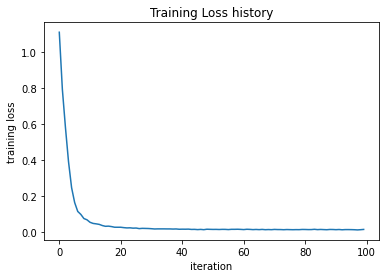

In [29]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [3]:
from utils.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302791000129089
iteration 100 / 1000: loss 2.3024341349048876
iteration 200 / 1000: loss 2.2987349799171355
iteration 300 / 1000: loss 2.2577687586870363
iteration 400 / 1000: loss 2.174942694041326
iteration 500 / 1000: loss 2.162584952148501
iteration 600 / 1000: loss 2.0558477295338364
iteration 700 / 1000: loss 2.0884969384989933
iteration 800 / 1000: loss 1.9623944360539973
iteration 900 / 1000: loss 2.0667355733672967
Validation accuracy:  0.275


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [41]:
stats['train_acc_history']

[0.12, 0.25, 0.16, 0.235, 0.305]

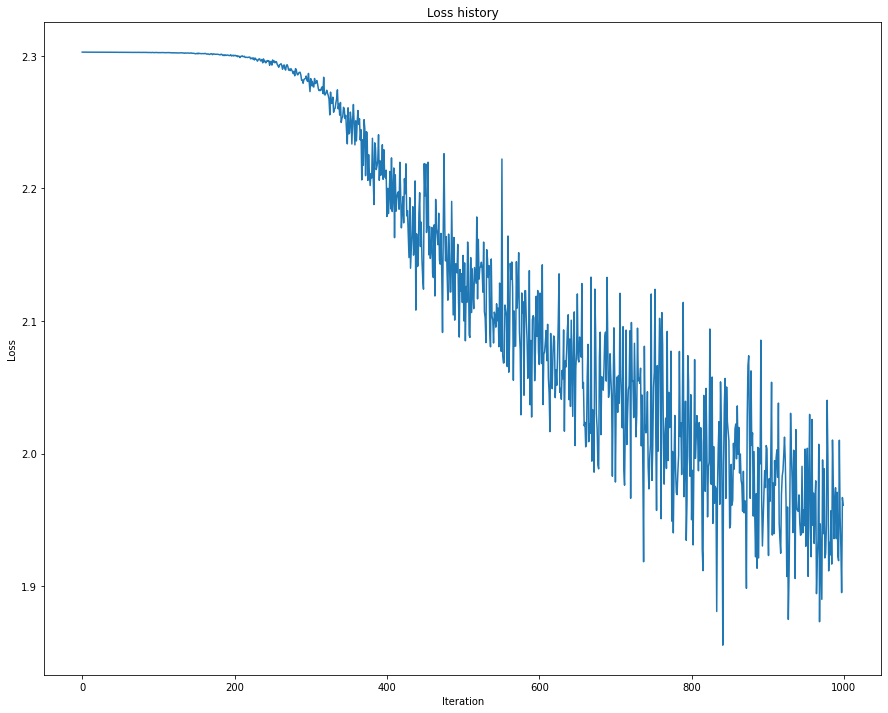

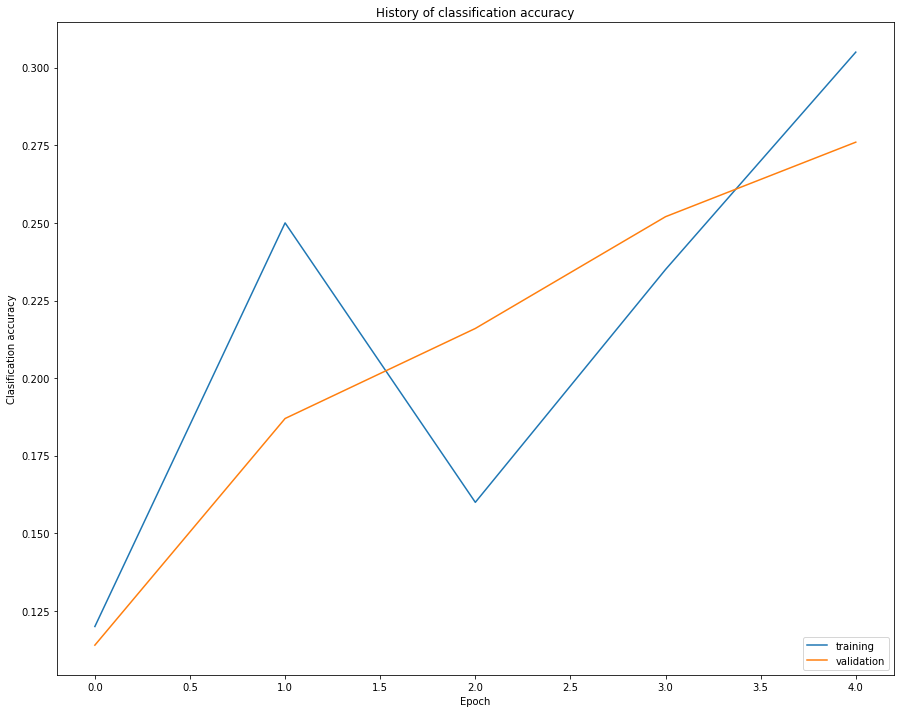

In [43]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies

plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.gcf().set_size_inches(15, 12)
plt.show()

fig, ax = plt.subplots()
plt.plot(stats['train_acc_history'], label='training')
plt.plot(stats['val_acc_history'], label='validation')

legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.80')

plt.title('History of classification accuracy')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) Training accuracy and validation accuracy increase for 1000 iterations, and we don't seems to reach a point where the training accuracy increases while the validation accuracy decreases, indicating overfitting, so we can increase the number of iterations until we reach that the local minima. The loss is also not decreasing fast enough (looks about linear), hence increasing the learning rate should show a faster rate of decrease of loss

(2) By choosing the optimal hyperparamters: learning rate, regression coefficicent and the batch size.

In [46]:
learning_rates = [10**i for i in range(-7,-1)]
learning_rates

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [5]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10


# Hyperparameters
batch_sizes = list(np.arange(200,250,10))
learning_rates = list(10**np.arange(-4,-3,0.2))
regs = list(np.arange(0.1,0.25,0.05))

all_stats = []
hypers = []
validation_accuracies = []
nets = []

target_acc = 0.5
class BreakIt(Exception): pass
# Train the network
try:
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            for reg in regs:
                print(  "Batch Size {} LR {} Reg {} ".format(batch_size,learning_rate,reg))
                hypers.append([batch_size,learning_rate,reg])
                net = TwoLayerNet(input_size, hidden_size, num_classes)
                all_stats.append(net.train(X_train, y_train, X_val, y_val,
                            num_iters=3000, batch_size=batch_size,
                            learning_rate=learning_rate, learning_rate_decay=0.95,
                            reg=reg, verbose=True))
                
                nets.append(net)

                # Predict on the validation set
                val_acc = (net.predict(X_val) == y_val).mean()
                print('Validation accuracy: ', val_acc)
                validation_accuracies.append(val_acc)

                if val_acc >= target_acc:
                    best_net = net
                    print(" Target Reached: Validation Accuracy {} Batch Size {} LR {} Reg {} ".format(val_acc, batch_size,learning_rate,reg))
                    raise BreakIt
except BreakIt:
    pass


# Save this net as the variable subopt_net for later comparison.
# subopt_net = net
index_max = max(range(len(validation_accuracies)), key=validation_accuracies.__getitem__)
print('Best Validation accuracy (from list): ', validation_accuracies[index_max])
# Pick Best Net 
best_net = nets[index_max]
best_hypers = hypers[index_max]
print("Best batch_size {},learning rate {},regularization {} ".format(*best_hypers))

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Best Validation accuracy: ', val_acc)

Batch Size 200 LR 0.0001 Reg 0.1 
iteration 0 / 3000: loss 2.30268554139324
iteration 100 / 3000: loss 2.30233145039166
iteration 200 / 3000: loss 2.297972412804607
iteration 300 / 3000: loss 2.2715664753055806
iteration 400 / 3000: loss 2.2022420077688865
iteration 500 / 3000: loss 2.1322705490591245
iteration 600 / 3000: loss 2.096388721893236
iteration 700 / 3000: loss 2.095892801175881
iteration 800 / 3000: loss 1.9747689044764436
iteration 900 / 3000: loss 2.0119734373454614
iteration 1000 / 3000: loss 1.908332730743812
iteration 1100 / 3000: loss 1.9669605998139288
iteration 1200 / 3000: loss 1.9098891442575312
iteration 1300 / 3000: loss 1.9140377415016214
iteration 1400 / 3000: loss 1.822674653997229
iteration 1500 / 3000: loss 1.8944949937078537
iteration 1600 / 3000: loss 1.7389384493337987
iteration 1700 / 3000: loss 1.751684368860164
iteration 1800 / 3000: loss 1.7562023382246377
iteration 1900 / 3000: loss 1.8701744813490377
iteration 2000 / 3000: loss 1.749925596506903
it

In [6]:
best_hypers

[200, 0.0006309573444801943, 0.1]

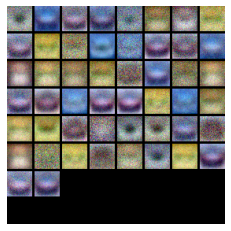

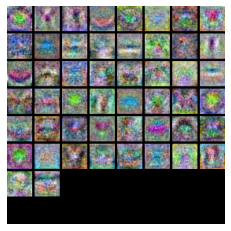

In [9]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) Each layer in best_net has more detail and depth in how it chooses to express the visual attributes in each layer, while in subopt_net they look very smoothed out, not capturing detail very well. 

## Evaluate on test set 

In [10]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.504


## neural_net.py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class TwoLayerNet(object):
  """
  A two-layer fully-connected neural network. The net has an input dimension of
  N, a hidden layer dimension of H, and performs classification over C classes.
  We train the network with a softmax loss function and L2 regularization on the
  weight matrices. The network uses a ReLU nonlinearity after the first fully
  connected layer.

  In other words, the network has the following architecture:

  input - fully connected layer - ReLU - fully connected layer - softmax

  The outputs of the second fully-connected layer are the scores for each class.
  """

  def __init__(self, input_size, hidden_size, output_size, std=1e-4):
    """
    Initialize the model. Weights are initialized to small random values and
    biases are initialized to zero. Weights and biases are stored in the
    variable self.params, which is a dictionary with the following keys:

    W1: First layer weights; has shape (H, D)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (C, H)
    b2: Second layer biases; has shape (C,)

    Inputs:
    - input_size: The dimension D of the input data.
    - hidden_size: The number of neurons H in the hidden layer.
    - output_size: The number of classes C.
    """
    self.params = {}
    self.params['W1'] = std * np.random.randn(hidden_size, input_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = std * np.random.randn(output_size, hidden_size)
    self.params['b2'] = np.zeros(output_size)


  def loss(self, X, y=None, reg=0.0):
    """
    Compute the loss and gradients for a two layer fully connected neural
    network.

    Inputs:
    - X: Input data of shape (N, D). Each X[i] is a training sample.
    - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] < C. This parameter is optional; if it
      is not passed then we only return scores, and if it is passed then we
      instead return the loss and gradients.
    - reg: Regularization strength.

    Returns:
    If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
    the score for class c on input X[i].

    If y is not None, instead return a tuple of:
    - loss: Loss (data loss and regularization loss) for this batch of training
      samples.
    - grads: Dictionary mapping parameter names to gradients of those parameters
      with respect to the loss function; has the same keys as self.params.
    """
    # Unpack variables from the params dictionary
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    N, D = X.shape

    # Compute the forward pass
    scores = None

    # ================================================================ #
    # YOUR CODE HERE:
    #   Calculate the output scores of the neural network.  The result
    #   should be (N, C). As stated in the description for this class,
    #   there should not be a ReLU layer after the second FC layer.
    #   The output of the second FC layer is the output scores. Do not
    #   use a for loop in your implementation.
    # ================================================================ #

    reLu = lambda x: np.maximum(x, 0)
    # reLu= lambda x: x*(x>0)

    R = np.dot(X,W1.T) + b1#.reshape(1,1)  # DIMS (N,H)
    H1 = reLu(R)
    Z = np.dot(H1,W2.T) + b2#.reshape(1,1)  # DIMS (N,C)
    
    scores = Z
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

  
    # If the targets are not given then jump out, we're done
    if y is None:
      return scores

    # Compute the loss
    loss = None

    # ================================================================ #
    # YOUR CODE HERE:
    #   Calculate the loss of the neural network.  This includes the
    #   softmax loss and the L2 regularization for W1 and W2. Store the
    #   total loss in teh variable loss.  Multiply the regularization
    #   loss by 0.5 (in addition to the factor reg).
    # ================================================================ #

    # scores is num_examples by num_classes
    
    class_probs = np.exp(scores) / np.sum(np.exp(scores), axis = 1,keepdims= True)
    ce_loss = -np.log(class_probs[np.arange(N), y])
    
    soft_loss = np.sum(ce_loss )
    loss  = soft_loss/N

    frob_norm_W1 = (W1** 2).sum()
    frob_norm_W2 = (W2** 2).sum()
    
    reg_W1 = 0.5*reg*frob_norm_W1
    reg_W2 = 0.5*reg*frob_norm_W2

    loss = loss + reg_W1 +reg_W2
  


    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    grads = {}

    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the backward pass.  Compute the derivatives of the
    #   weights and the biases.  Store the results in the grads
    #   dictionary.  e.g., grads['W1'] should store the gradient for
    #   W1, and be of the same size as W1.
    # ================================================================ #
    grad_softmax = class_probs
    grad_softmax[np.arange(N), y] -= 1
    
    grad_softmax = grad_softmax/N

    # print(grad_softmax.shape)
    # print(H1.shape)
    grads['W2'] = np.dot(grad_softmax.T,H1)
    grads['b2'] = np.sum(grad_softmax,axis=0)
    # print(grad_softmax.shape)
    dLbydH1 = np.dot( grad_softmax,W2)
   
    dLbydR = dLbydH1
    dLbydR[R<=0] =0
    dLbydB = dLbydR
    dLbydP = dLbydR
    
    grads['W1'] = np.dot(dLbydP.T,X)
    grads['b1'] = np.sum(dLbydR,axis=0)

    grads['W2'] += reg * W2
    grads['W1'] += reg * W1

 
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    return loss, grads

  def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
    """
    Train this neural network using stochastic gradient descent.

    Inputs:
    - X: A numpy array of shape (N, D) giving training data.
    - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
      X[i] has label c, where 0 <= c < C.
    - X_val: A numpy array of shape (N_val, D) giving validation data.
    - y_val: A numpy array of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    - verbose: boolean; if true print progress during optimization.
    """
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train / batch_size, 1)

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in np.arange(num_iters):
      X_batch = None
      y_batch = None

      # ================================================================ #
      # YOUR CODE HERE:
      #   Create a minibatch by sampling batch_size samples randomly.
      # ================================================================ #
      random_indices = np.random.choice(np.arange(num_train), batch_size)
      X_batch = X[random_indices]
      y_batch = y[random_indices]

      # ================================================================ #
      # END YOUR CODE HERE
      # ================================================================ #

       # Compute loss and gradients using the current minibatch
      loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
      loss_history.append(loss)

      # ================================================================ #
      # YOUR CODE HERE:
      #   Perform a gradient descent step using the minibatch to update
      #   all parameters (i.e., W1, W2, b1, and b2).
      # ================================================================ #

      self.params['W2'] += -learning_rate * grads['W2']
      self.params['W1'] += -learning_rate * grads['W1']

      self.params['b2'] += -learning_rate * grads['b2']
      self.params['b1'] += -learning_rate * grads['b1']

      # ================================================================ #
      # END YOUR CODE HERE
      # ================================================================ #

      if verbose and it % 100 == 0:
        print('iteration {} / {}: loss {}'.format(it, num_iters, loss))

      # Every epoch, check train and val accuracy and decay learning rate.
      if it % iterations_per_epoch == 0:
        # Check accuracy
        train_acc = (self.predict(X_batch) == y_batch).mean()
        val_acc = (self.predict(X_val) == y_val).mean()
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        # Decay learning rate
        learning_rate *= learning_rate_decay

    return {
      'loss_history': loss_history,
      'train_acc_history': train_acc_history,
      'val_acc_history': val_acc_history,
    }

  def predict(self, X):
    """
    Use the trained weights of this two-layer network to predict labels for
    data points. For each data point we predict scores for each of the C
    classes, and assign each data point to the class with the highest score.

    Inputs:
    - X: A numpy array of shape (N, D) giving N D-dimensional data points to
      classify.

    Returns:
    - y_pred: A numpy array of shape (N,) giving predicted labels for each of
      the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
      to have class c, where 0 <= c < C.
    """
    y_pred = None

    # ================================================================ #
    # YOUR CODE HERE:
    #   Predict the class given the input data.
    # ================================================================ #
    N = X.shape[0]
    y_pred = np.empty((N,), dtype=int)
    reLu = lambda x: np.maximum(x, 0)

    R = np.dot(X, self.params['W1'].T) + self.params['b1']
    H1 = reLu(R)
    Z = np.dot(H1, self.params['W2'].T) + self.params['b2']
    softmax = np.exp(Z)/np.sum(np.exp(Z), axis=1, keepdims=True)


    for i in range(N):
        max_index = np.argmax(softmax[i])
        y_pred[i] = max_index


    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    return y_pred
